In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import spicy
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from pylab import rcParams
rcParams['figure.figsize']= 14, 8
RANDOM_SEED = 42


In [162]:
data = pd.read_csv(r"C:\Users\lekan\Downloads\archive (19).zip")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


C:\Users\lekan\AppData\Local\Temp\ipykernel_18880\1609074323.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Category'], sort = True)


<Axes: xlabel='Category'>

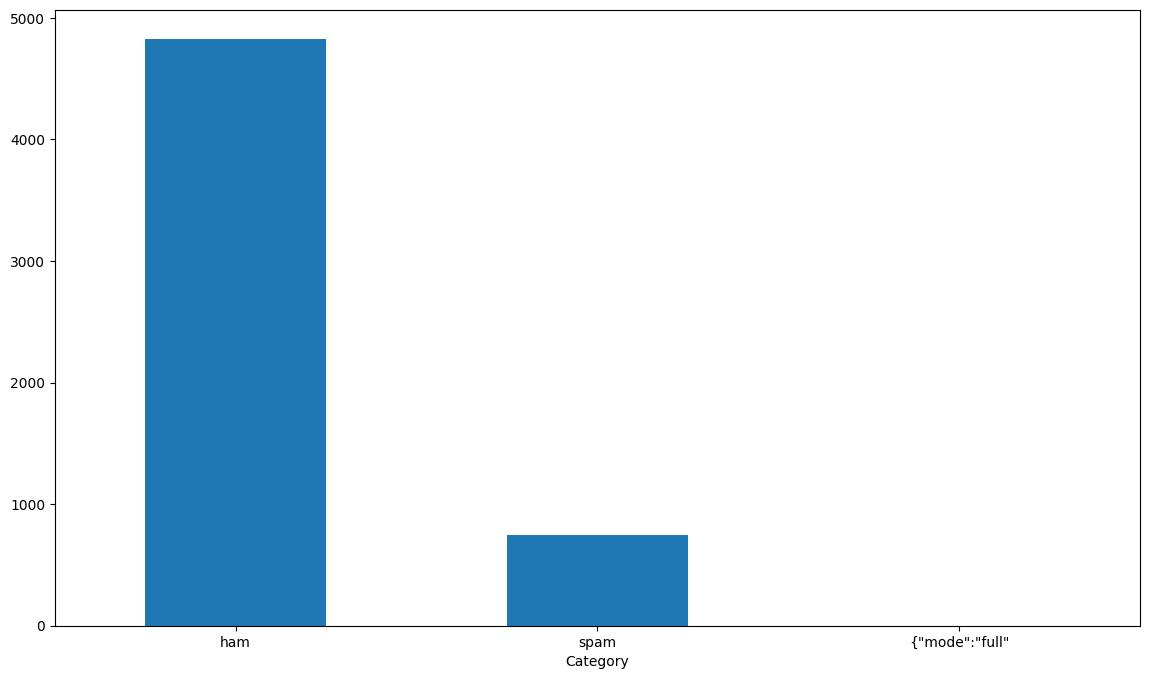

In [164]:
count_classes = pd.value_counts(data['Category'], sort = True)

count_classes.plot(kind = 'bar', rot = 0)

In [191]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [166]:
data.loc[data['Category']== 'spam','Category'] =0
data.loc[data['Category']== 'ham', 'Category']= 1

In [167]:
Y =  data['Category']

X = data['Message']

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5573,)
(4458,)
(1115,)


In [169]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
# import re
# from nltk.stem import PorterStemmer

In [170]:
feature_extraction = TfidfVectorizer(min_df= 1, stop_words='english', lowercase = True)
X_train_vectorized = feature_extraction.fit_transform(X_train)
X_test_vectorized = feature_extraction.transform(X_test)

In [171]:
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)

(4458, 7433)
(1115, 7433)


In [172]:
# print(Y_train.shape)
Y_train= pd.Series(Y_train)

In [173]:
print(type(Y_train))  # Should be a list, array, or pandas Series
print(set(Y_train))  # Check for unexpected values



<class 'pandas.core.series.Series'>
{0, 1, '{"mode":"full"'}


In [174]:
print(Y_train[:10])  # Display the first 10 entries


2315    1
2041    1
3079    1
3423    0
1698    1
1717    1
4490    1
4878    1
3532    1
4781    1
Name: Category, dtype: object


In [175]:


# Replace invalid labels with 0 (ham)
Y_train = [0 if label == '{"mode":"full"' else label for label in Y_train]
print(set(Y_train))

# Convert all labels to integers
# Y_train = [int(label) if label not in ['{"mode":"full"}'] else 0 for label in Y_train]
# print(set(Y_train))  # Should output {0, 1}


{0, 1}


In [176]:
from sklearn import svm
clf = svm.SVC(kernel= 'linear', C=1000)

clf.fit(X_train_vectorized, Y_train)




SVC(C=1000, kernel='linear')

In [177]:
print(X_test_vectorized.shape)
print(X.shape)
print(X_train_vectorized.shape)

(1115, 7433)
(5573,)
(4458, 7433)


In [178]:
y_pred = clf.predict(X_test_vectorized)

In [179]:
# Convert Y_train (if it's a list or array of np.str_ elements)
y_pred = [int(label) for label in y_pred]

print(set(y_pred))


{0, 1}


In [ ]:

print(set(Y_test))
print(set(y_pred))

{0, 1}
{0, 1}


In [216]:
print(type(y_pred))      # Check if it's a list, array, or DataFrame
print(set(Y_train))       # Inspect unique values in the labels
print(Y_train[:10])       # View the first 10 labels
print(set(Y_train))

# Y_test= Y_test.tolist()
print(type(Y_test)) 
print(set(Y)) 


<class 'numpy.ndarray'>
{0, 1}
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
{0, 1}
<class 'list'>
{0, 1}


In [189]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)

accuracy
print(f'accuracy: {accuracy * 100 :.2f} %')

accuracy: 98.48 %


In [190]:
from sklearn.metrics import confusion_matrix

confusion_matrixs = confusion_matrix(Y_test, y_pred)
confusion_matrixs 

array([[122,  14],
       [  3, 976]])

In [195]:
Y= [0 if label == '{"mode":"full"' else label for label in Y]

print(set(Y)) 


{0, 1}


In [ ]:
X_vectorized = feature_extraction.fit_transform(X)
X_dense = X_vectorized.toarray()  # Convert sparse matrix to dense format

vectorizer = TfidfVectorizer(max_features=3000, stop_words='english', lowercase=True)
X_vectorized = vectorizer.fit_transform(X) 

In [203]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500)
X_reduced = svd.fit_transform(X_vectorized)


In [204]:
smk = SMOTETomek(random_state=42)
x_res, y_res = smk.fit_resample(X_reduced,Y)

In [205]:
X_reduced.shape

(5573, 500)

In [210]:
from collections import Counter
print(f"Original class distribution: {Counter(Y)}")
print(f"Resampled class distribution: {Counter(y_res)}")


Original class distribution: Counter({1: 4825, 0: 748})
Resampled class distribution: Counter({1: 4825, 0: 4825})


In [212]:
X_res_train, X_res_test, Y_res_train, Y_res_test = train_test_split(x_res, y_res, test_size= 0.2, random_state= 3)

In [213]:
clf.fit(X_res_train, Y_res_train)

SVC(C=1000, kernel='linear')

In [217]:
y_res_pred = clf.predict(X_res_test)

In [ ]:
res_accuracy = accuracy_score(Y_res_test, y_res_pred)

res_accuracy
print(f'accuracy: {res_accuracy * 100 :.2f} %')

accuracy: 95.75 %


In [219]:
confusion_res = confusion_matrix(Y_res_test, y_res_pred)
confusion_res

array([[941,  22],
       [ 60, 907]])